### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №2

Текст задания:
1. Загрузите из набора данных "diamonds" следующие признаки: features/depth, features/z, price
2. Определите признак с минимальным квантилем уровня 0.9 и постройте гистограмму значений признака.
3. Для признака, имеющего минимальное стандартное отклонение, постройте и визуализируйте эмперическую плотность распределения.
4. Вычислите матрицу корреляции признаков и для пары признаков с наиболее низкой корреляцией постройте диаграмму рассеяния.

Решение:

In [4]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

In [5]:
# загрузим датасет и преобразуем его в датафрейм
ds = tfds.load("diamonds", split = 'train')
df = tfds.as_dataframe(ds)

In [6]:
# оставим в датафрейме только те признаки, которые указаны в задании
df = df[['features/depth','features/z','price']]

df.head()

,features/depth,features/z,price
0,60.599998,4.23,6546.0
1,62.099998,3.71,3030.0
2,61.700001,3.27,1915.0
3,64.000000,4.64,6936.0
4,62.200001,2.76,646.0


In [11]:
# выведем таблицу значений 0.9 квантиля для оставшихся признаков
df.quantile(0.9)

features/depth      63.299999
features/z           4.520000
price             9821.000000
Name: 0.9, dtype: float64

In [32]:
# найдем минимальное из этих значений
df.quantile(0.9).min()

4.519999980926514

In [33]:
# найдем название признака с минимальным значением квантиля 0.9
minq = df.quantile(0.9).idxmin(axis=0)
print(minq)

features/z


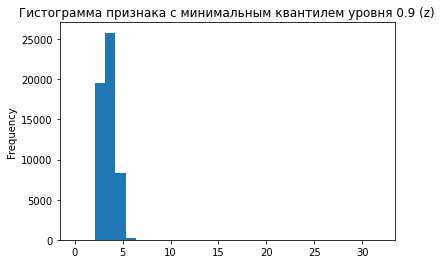

In [34]:
# построим гистрограмму этого признака
df[minq].plot.hist(bins=30, title='Гистограмма признака с минимальным квантилем уровня 0.9 (z)')

In [30]:
# выведем таблицу стандартного отклонения для каждого признака
df.std()

features/depth       1.432655
features/z           0.705719
price             3989.432861
dtype: float32

In [31]:
# найдем минимальное их них
df.std().min()

0.7057189345359802

In [35]:
# найдем названия признака с минимальным стандартным отклонением
mins = df.std().idxmin(axis=0)
print(mins)

features/z


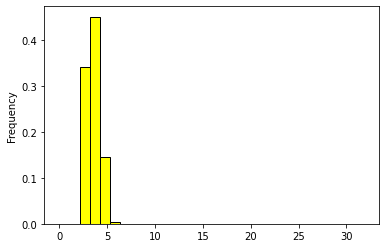

In [37]:
# построим эмпирическую плотность распределения
df[mins].plot.hist(color='yellow', edgecolor='black', bins=30, density=True);

In [38]:
# вычислим матрицу корреляции признаков
df.corr()

,features/depth,features/z,price
features/depth,1.000000,0.094924,-0.010647
features/z,0.094924,1.000000,0.861249
price,-0.010647,0.861249,1.000000


In [40]:
# найдем минимальное значение, для этого сначала найдем минимум по строкам, а затем из них найдем минимум по столбцам
df.corr().min().min()
# видим, что минимальная корреляция между признаками price и features/depth

-0.010647408001393435

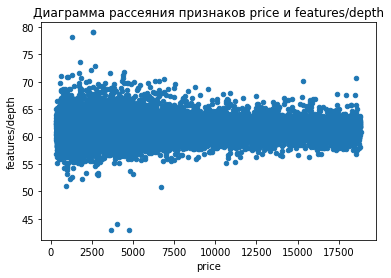

In [82]:
# строим диаграмму рассеивания для этих признаков
df.plot.scatter('price','features/depth',title='Диаграмма рассеяния признаков price и features/depth')